<a href="https://colab.research.google.com/github/Samuel-Wamwitha/Prep-Project-Week/blob/master/Copy_of_Moringa_Data_science__Prep_Project_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Variables used in the notebook

1. playstore => Dataset of the apps declared in prerequisites
2. reviews => Dataset of the reviews declared in prerequisited
3. ty => Dataframe with the info about the dataset playstore info
4. er => Dataframe with the info about the dataset reviews info
5. playprep => Dataset of playstore through the preperation
6. reviewprep => Dataset of the reviews through the preperation
7. groupreview => Dataset of the grouped by app summary of the dataset
8. dsin => Dataset of the inner join of the prepared playprep and groupreview
9. toanalysep => Dataset for analysis containing cleaned playstore dataset
10. toanalysem => Dataset for analysis containing merged dataset
11. toanalyser => Dataset for analysis containing cleaned review dataset

#Prerequisites

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

Loading our dataset


In [ ]:
with open("/content/googleplaystore.csv" , "r") as play:
  playstore = pd.read_csv(play)

In [ ]:
with open("/content/googleplaystore_user_reviews.csv" , "r") as rev:
  reviews = pd.read_csv(rev)

Previewing our dataset

In [ ]:
playstore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [ ]:
reviews.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


#1. BUSINESS UNDERSTANDING

Business Overview.
Google Play Store is a platform that enables  android users to easily acquire or get themselves apps, games and digital content to their devices either freely or at a cost that is predefined by the developer. The play store apps data has enormous potential and can help with creating insights to drive app making businesses. They also have actionable insights that can be drawn for developers to use when trying to capture the Android market.


Business Objective.
The main objective of this project is;
 To identify the category of Apps that developers should prioritize when developing applications.
The stipulations that are currently present getting an app onto the market.


#2. DATA UNDERSTANDING

###Premise

The premise to the data understanding was undertaken by a scan of the data and an assumption was made that the data within the columns could be described and further identified as the following: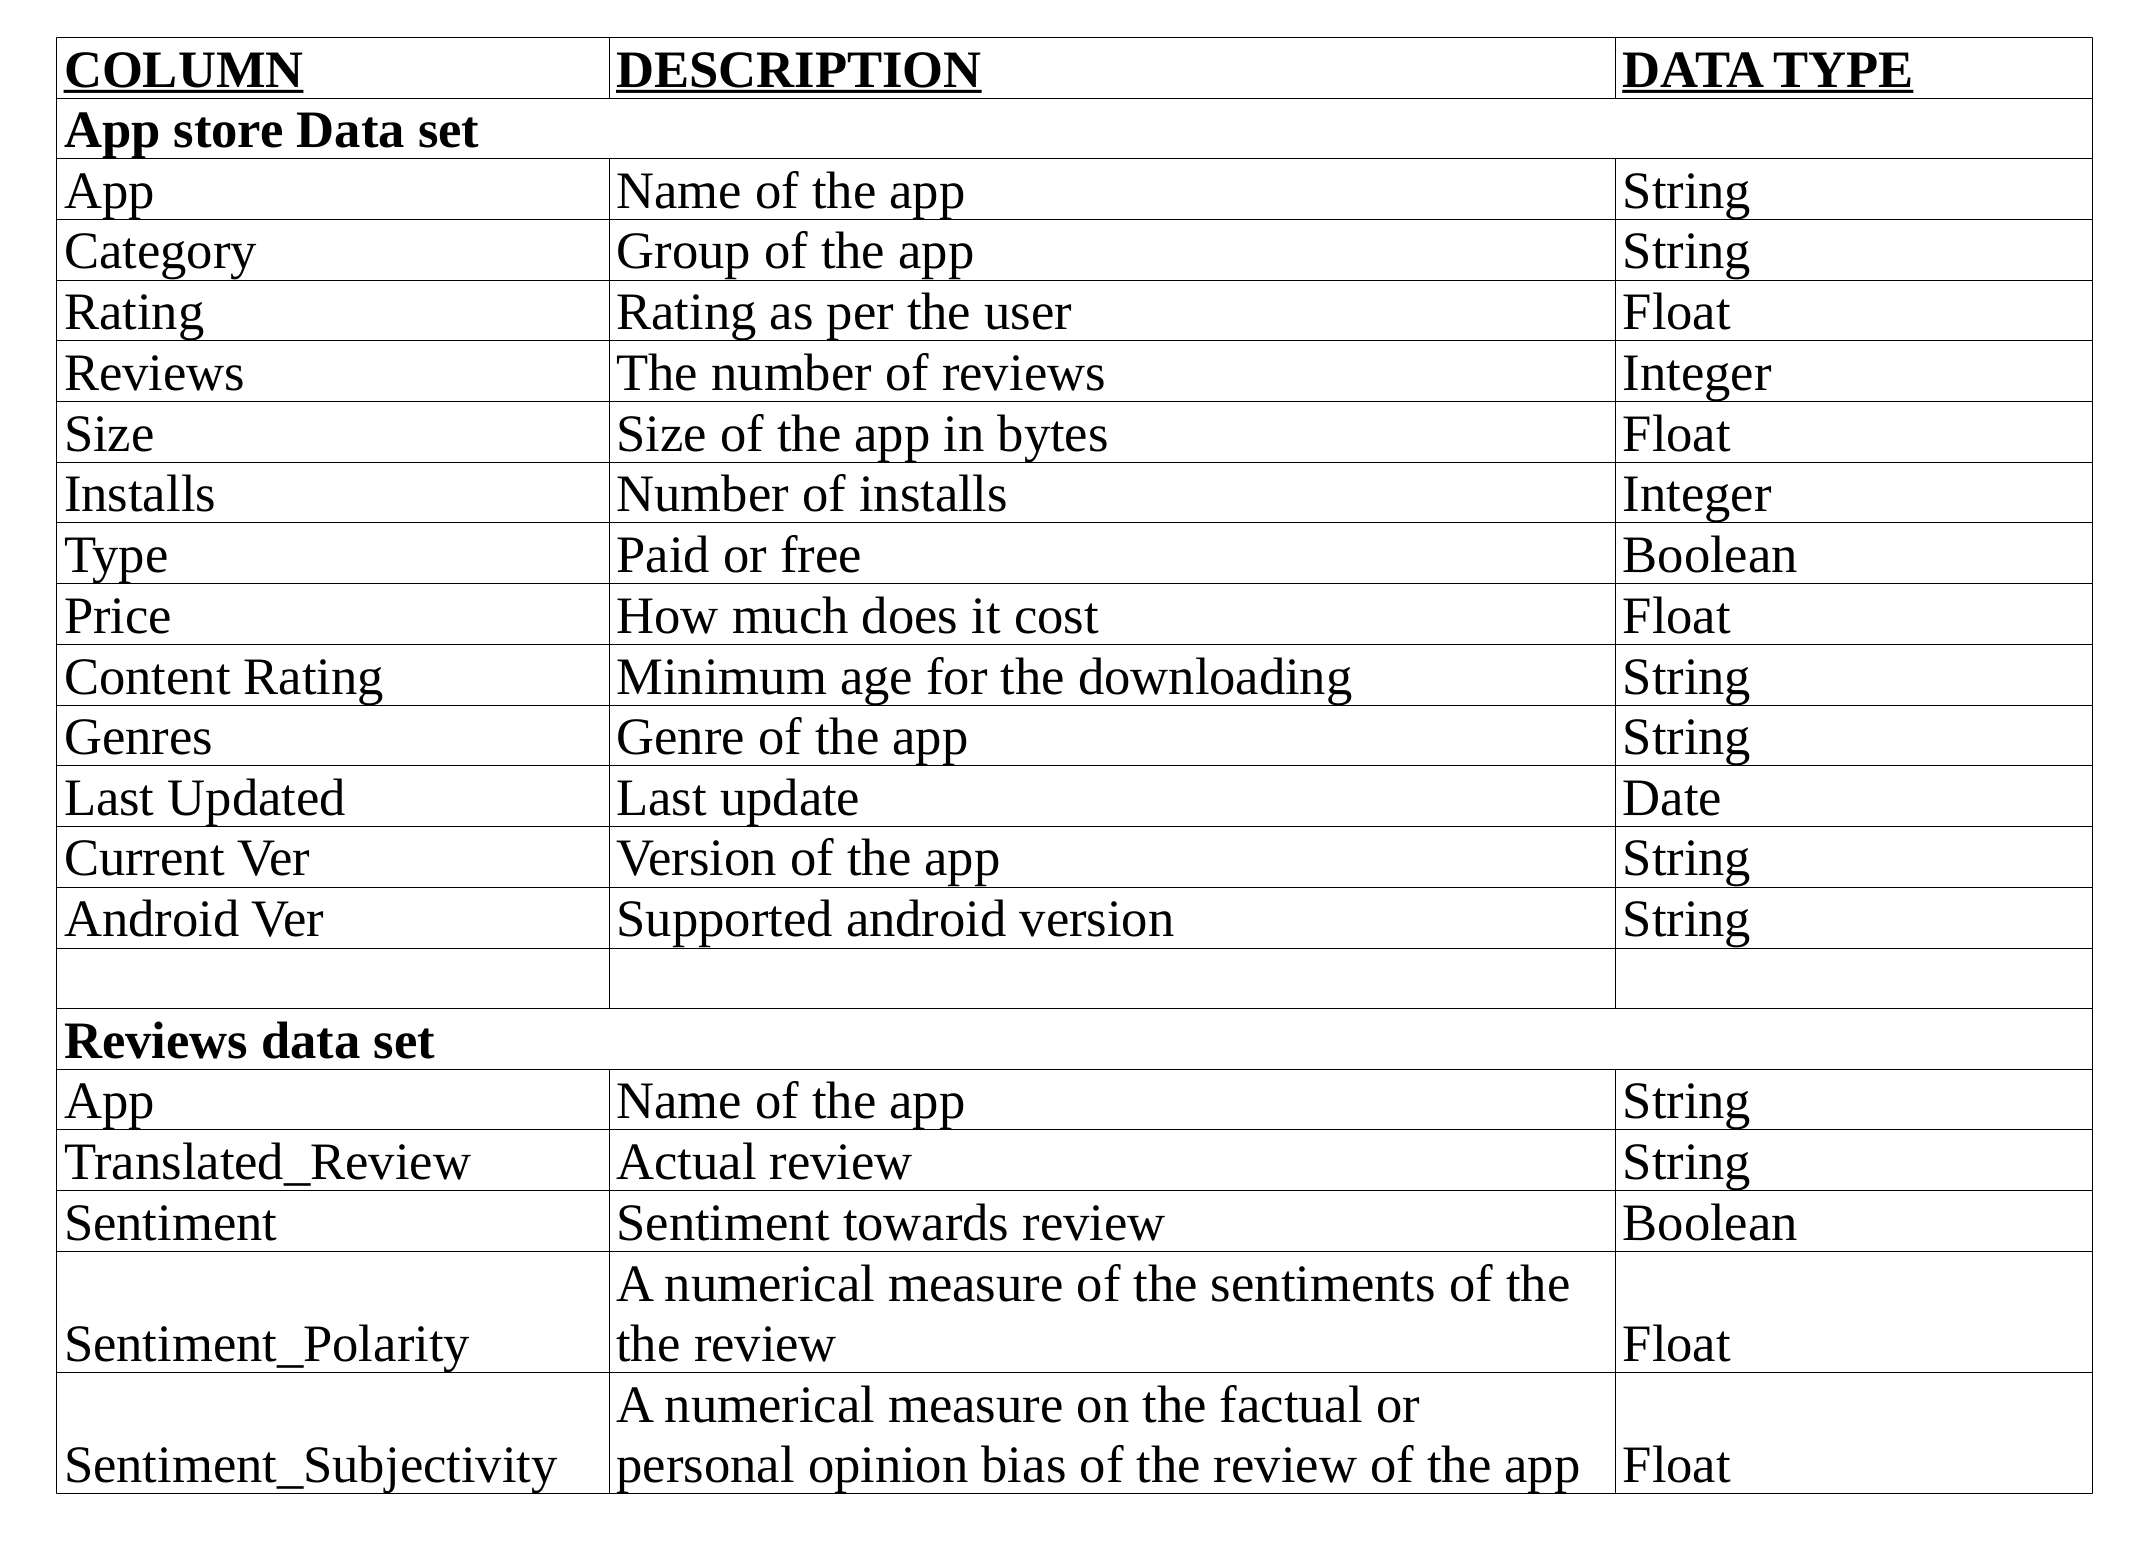

###Information of the Datasets that have been loaded.

Accessing information about the dataset

In [ ]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


###Dataframes describe the data that with more on the information

Both for organistation and reference; dataframe of the data description are made so as to give easier reference.

In [ ]:
ty = pd.DataFrame(playstore.isnull().sum())
ty.columns = ['Null sum']
ty['unique'] = 0
r = ty.index

for t in r:
  ty.loc[t, 'unique'] = len(playstore[t].unique())

ty

,Null sum,unique
App,0,9660
Category,0,34
Rating,1474,41
Reviews,0,6002
Size,0,462
Installs,0,22
Type,1,4
Price,0,93
Content Rating,1,7
Genres,0,120


In [ ]:
er = pd.DataFrame(reviews.isnull().sum())
er.columns = ['Null sum']
er['unique'] = 0
r = er.index
r = r[:-2]

for t in r:
  er.loc[t, 'unique'] = len(reviews[t].unique())

er

,Null sum,unique
App,0,1074
Translated_Review,26868,27995
Sentiment,26863,4
Sentiment_Polarity,26863,0
Sentiment_Subjectivity,26863,0


Since the Sentimen_polarity and the Sentiment_Subjectivity are continuous data; the most prudent way to measure was a range of the highest and the lowest value.

In [ ]:
er['max'] = ''
er['min'] = ''

r = er.index
r = r[-2:]
print (r)



for t in r:
  er.loc[t, 'max'] = max(reviews[t].unique())
  er.loc[t, 'min'] = min(reviews[t].unique())
er

Index(['Sentiment_Polarity', 'Sentiment_Subjectivity'], dtype='object')


,Null sum,unique,max,min
App,0,1074,,
Translated_Review,26868,27995,,
Sentiment,26863,4,,
Sentiment_Polarity,26863,0,1,-1
Sentiment_Subjectivity,26863,0,1,0


###The number of null values that occur within the datasets

Checking for null values

In [ ]:
playstore.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
reviews.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [ ]:
reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

###Conclusion of data understanding (Technical)

The table with the with combination of descriptive data is made. This is; with descriptive data and little unique values, they are printed within the table.

In [ ]:
er['combinations'] = ''
for t , row in er.iterrows():
  if row['unique'] < 20:
    er.loc[t, 'combnations'] = str(reviews[t].unique())

a = pd.DataFrame(reviews.dtypes)
er = er.merge(a , how= 'left' , left_index=True , right_index=True)

er

,Null sum,unique,max,min,combinations,combnations,0
App,0,1074,,,,NaN,object
Translated_Review,26868,27995,,,,NaN,object
Sentiment,26863,4,,,,['Positive' nan 'Neutral' 'Negative'],object
Sentiment_Polarity,26863,0,1,-1,,[ 1. 0.25 nan ... 0.35...,float64
Sentiment_Subjectivity,26863,0,1,0,,[0.53333333 0.28846154 nan ... 0.511458...,float64


The table with the with combination of descriptive data is made. This is; with descriptive data and little unique values, they are printed within the table.

In [ ]:
ty['combinations'] = ''
for t , row in ty.iterrows():
  if row['unique'] < 20:
    ty.loc[t, 'combnations'] = str(playstore[t].unique())

a = pd.DataFrame(playstore.dtypes)
ty = ty.merge(a , how= 'left' , left_index=True , right_index=True)

ty

,Null sum,unique,combinations,combnations,0
App,0,9660,,NaN,object
Category,0,34,,NaN,object
Rating,1474,41,,NaN,float64
Reviews,0,6002,,NaN,object
Size,0,462,,NaN,object
Installs,0,22,,NaN,object
Type,1,4,,['Free' 'Paid' nan '0'],object
Price,0,93,,NaN,object
Content Rating,1,7,,['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+'...,object
Genres,0,120,,NaN,object


For reasonably small unique data that couldn't be tabulated. The unique values are printed.

In [ ]:
for t , row in ty.iterrows():
  if row['unique'] > 5 and row['unique'] < 100:
    print ()
    print (t)
    print ()
    print(playstore[t].unique())


Category

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Rating

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

Installs

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']

Price

['0' '$4.99 ' '$3.99 ' '$6.99 ' '$1.49 ' '$2.99 ' '$7.99 ' '$5.

###Conclusion of data understanding (Report)

With the premise recorded [what was anticipated that the data would be] compared to what the data is, the data can at this point be stated as fully understood.
A conflict has been found where there are different datatypes within the data compared to the premise table. This shall be corrected within the data preparation.
In the cells above we can conclude that:
1. Column Installs has ranked data despite it originating from integers
2. Content Rating is categorical with a possibility of 7 different states. Also the nan values can be substitued with 'Unrated'
3. For column rating nan values can be replaced with a mean of the apps rating.
4. Android version can be represented as a float.
5. The data from column type is dependent on column price and should either be Paid or Free and the other data will depend on the price column.
6. Column sentiment_polarity is dependent on the column sentiment and has data varying from -1 to 1
7. Column sentiment has three possible outcomes: positive negative and neutral; nan values can be stated as neutral
8. Sentiment subjectivity ranges from 0 to 1 which represents a ratio


#3. DATA PREPARATION


1. Column Installs has ranked data despite it originating from integers
2. Content Rating is categorical with a possibility of 7 different states. Also the nan values can be substitued with 'Unrated'
3. For column rating nan values can be replaced with a mean of the apps rating.
4. Android version can be represented as a float.
5. The data from column type is dependent on column price and should either be Paid or Free and the other data will depend on the price column.
6. Column sentiment_polarity is dependent on the column sentiment and has data varying from -1 to 1
7. Column sentiment has three possible outcomes: positive negative and neutral; nan values can be stated as neutral
8. Sentiment subjectivity ranges from 0 to 1 which represents a ratio

In [ ]:
playstore.drop (playstore[playstore ['Price'] == 'Everyone'].index , inplace = True)

In [ ]:
playprep = playstore
reviewprep = reviews

##The size column

The size column is a bit unique since there is a suffix of the data that describes the multiplier of the size. This is, m for megabytes (multiply by 1000000) and k for kilobytes etc

In [ ]:
playprep = playstore

w = []
for i, row in playprep.iterrows():
  w.append(row['Size'][-1:])

e = pd.DataFrame(w)
e[0].unique()

array(['M', 'e', 'k'], dtype=object)

Finding the data that is represented by the last character being e

In [ ]:
playprep = playstore

w = []
for i, row in playprep.iterrows():
  if (row['Size'][-1:]) == 'e':
    w.append(row['Size'])

e = pd.DataFrame(w)
e[0].unique()

array(['Varies with device'], dtype=object)

The last value is 'Varies with device' which cannot be numerically represented but can still be represented as a group.

In [ ]:
playprep = playstore

for i, row in playprep.iterrows():
  if row['Size'][-1:] == 'M':
      playprep.loc[i, 'Size'] = (float (row['Size'][:-1])) * 1000000
      #print (row['Size'][:-1])
  elif row['Size'][-1:] == 'k':
      playprep.loc[i, 'Size'] = (float (row['Size'][:-1]))* 1000
      #print (row['Size'][:-1])
  elif row['Size'][-1:] == 'e':
      playprep.loc[i, 'Size'] = -10
      #print (row['Size'][:-1])


##Replacing strange characters

Replacing of characters that are combined with numerical data so as to prepare them for changing to numbers

In [ ]:
playprep ['Price'] = playprep['Price'].str.replace ("$","")
playprep ['Installs'] = playprep['Installs'].str.replace ("+","")
playprep ['Installs'] = playprep['Installs'].str.replace (",","")

In [ ]:
playprep

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,1.9e+07,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,1.4e+07,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7e+06,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,2.5e+07,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8e+06,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5.3e+07,5000,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6e+06,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5e+06,1000,Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-10,1000,Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


The below two cells are a confirmation process where theygive outputs if there is any data within the cells that cannot be changed to numbers.

In [ ]:
for y , row in playprep.iterrows():
  try:
    float (row['Price'])
  except ValueError:
    print(row['Price'])

In [ ]:
for y , row in playprep.iterrows():
  try:
    float (row['Installs'])
  except ValueError:
    print(row['Installs'])

##Changing to numbers

Changing columns to numerical data.

In [ ]:
playprep['Installs'] = pd.to_numeric(playprep['Installs'])
playprep['Price'] = pd.to_numeric(playprep['Price'])
playprep['Rating'] = pd.to_numeric(playprep['Rating'])
playprep['Size'] = pd.to_numeric(playprep['Size'])

##Replacement of substitutable data where applicable.

This section changes respective data that is represented in a two ways. Null values with unrated and 0 with free for price. Basically solving the synonym problem (multiple descriptions for a simillar state)

In [ ]:
playprep['Content Rating'] = playprep['Content Rating'].replace ('' , 'Unrated')
playprep['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
playprep['Type'] = playprep['Type'].replace ('0' , 'Free')
playprep['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

##Sorting of the null values in the Type column.

From the data understanding table, it can bee seen that there is 1 null value that did not have the pricing info. This section edits the record.

In [ ]:
ty

,Null sum,unique,combinations,combnations,0
App,0,9660,,NaN,object
Category,0,34,,NaN,object
Rating,1474,41,,NaN,float64
Reviews,0,6002,,NaN,object
Size,0,462,,NaN,object
Installs,0,22,,NaN,object
Type,1,4,,['Free' 'Paid' nan '0'],object
Price,0,93,,NaN,object
Content Rating,1,7,,['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+'...,object
Genres,0,120,,NaN,object


In [ ]:
#price = 0 , then its a free app
for r , row in playprep.iterrows():
  if row['Type'] != 'Free' and row['Type'] != 'Paid':
    print (row)

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                                    -10
Installs                                  0
Type                                    NaN
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                      28-Jun-18
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object


In [ ]:
#changed it to free
playprep.loc[9148 , 'Type'] = 'Free'

In [ ]:
playprep['Type'] = playprep['Type'].replace ('0' , 'Free')
playprep['Type'].unique()

array(['Free', 'Paid'], dtype=object)

##Drop null values of the reviews data set

Dropping the columns in the review dataset that cannot be used due to null values.

In [ ]:
reviewprep.dropna(axis = 0, thresh = 3, inplace=True)
reviewprep.reset_index(inplace=True)
reviewprep

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...
11651,18347,Bubble Shooter Genies,"Some levels insanely stuck days. Overall, love...",Negative,-0.121429,0.476190
11652,18352,Bubble Shooter Genies,"Great game, addictive like can't get coins qui...",Positive,0.234722,0.612500
11653,18354,Bubble Shooter Genies,I love game still big glitch. It constantly fr...,Positive,0.020000,0.286667
11654,18361,Bubble Shooter Genies,Remove advertisements games I delete! There's ...,Neutral,0.000000,0.500000


In [ ]:
q = pd.DataFrame(reviewprep.isnull().sum())
q.columns = ['Null Sum']
q

,Null Sum
index,0
App,0
Translated_Review,2
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


##Correlation

Confirmation of an integral link betweem Sentiment, Sentiment_polarity such that positive, negative and neutral are properly represented numerically.

In [ ]:
#if there is any print output there is an error within the correlations

for w , row in reviewprep.iterrows():
  if row['Sentiment'] == 'Positive' and row['Sentiment_Polarity'] <= 0 :
    print ('pos')
  if row['Sentiment'] == 'Negative' and row['Sentiment_Polarity'] >= 0 :
    print ('neg')
  if row['Sentiment'] == 'Neutral' and row['Sentiment_Polarity'] != 0 :
    print ('neu')

##Sentiment Bias

The Sentiment_polarity represents either the positivity of the data while the Sentiment_subjectivity represent how close to facts the reviews are with ratios between 0 and 1. A product of the two will give both a bias of the sentiment and the effect of subjectivity of the review as one collective continuous value.

In [ ]:
reviewprep['bias'] = reviewprep['Sentiment_Polarity'] * reviewprep['Sentiment_Subjectivity']

In [ ]:
reviewprep

,index,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,bias
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,0.072115
2,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,0.350000
3,4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,0.300000
4,5,10 Best Foods for You,Best way,Positive,1.000000,0.300000,0.300000
...,...,...,...,...,...,...,...
11651,18347,Bubble Shooter Genies,"Some levels insanely stuck days. Overall, love...",Negative,-0.121429,0.476190,-0.057823
11652,18352,Bubble Shooter Genies,"Great game, addictive like can't get coins qui...",Positive,0.234722,0.612500,0.143767
11653,18354,Bubble Shooter Genies,I love game still big glitch. It constantly fr...,Positive,0.020000,0.286667,0.005733
11654,18361,Bubble Shooter Genies,Remove advertisements games I delete! There's ...,Neutral,0.000000,0.500000,0.000000


##Data cleaning playstore

Dropping of records that are duplicated

In [ ]:
playprep

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-10.0,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [ ]:
playprep['App'].duplicated().sum()

1181

In [ ]:
playprep.drop_duplicates(inplace = True)

In [ ]:
playprep.drop_duplicates(['App'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-10.0,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


##Summarizing of the review data set

Grouping of the review dataset by the name of the app. Also the mean of the bias described above. Also, the the cummulative number of review per app is found to find the sentiment bias and sample size later on in analysis.

In [ ]:
groupreview = reviewprep.groupby('App').mean()
groupreview = groupreview.drop(columns=['index'])
groupreview


,Sentiment_Polarity,Sentiment_Subjectivity,bias
App,,,
10 Best Foods for You,0.470733,0.495455,0.286232
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516,0.288163
11st,0.181294,0.443957,0.109622
1800 Contacts - Lens Store,0.318145,0.591098,0.238243
1LINE – One Line with One Touch,0.196290,0.557315,0.151797
...,...,...,...
Browser 4G,0.337084,0.442903,0.228455
Bualuang mBanking,0.004322,0.348247,0.001777
Bubble Shooter,0.253676,0.515660,0.157889


In [ ]:
#groupreview['Revno'] = 0
#rt = groupreview.index
#for e in rt:
a = pd.DataFrame(reviewprep['App'].value_counts ())
a.columns = ['Review No']
a

,Review No
Bowmasters,312
Angry Birds Classic,273
8 Ball Pool,219
10 Best Foods for You,194
Alto's Adventure,175
...,...
Bed Time Fan - White Noise Sleep Sounds,1
Apartment Decorating Ideas,1
Best Fiends - Free Puzzle Game,1
Best Ovulation Tracker Fertility Calendar App Glow,1


In [ ]:
#merging of the datasets made above

groupreview = pd.merge(groupreview,a,left_index=True,right_index=True)
groupreview

,Sentiment_Polarity,Sentiment_Subjectivity,bias,Review No
10 Best Foods for You,0.470733,0.495455,0.286232,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516,0.288163,40
11st,0.181294,0.443957,0.109622,40
1800 Contacts - Lens Store,0.318145,0.591098,0.238243,80
1LINE – One Line with One Touch,0.196290,0.557315,0.151797,38
...,...,...,...,...
Browser 4G,0.337084,0.442903,0.228455,34
Bualuang mBanking,0.004322,0.348247,0.001777,34
Bubble Shooter,0.253676,0.515660,0.157889,145
Bubble Shooter 2,0.284848,0.523485,0.216995,11


##Merging

All the cleaned data is merged

In [ ]:
dsin = pd.merge(playprep, groupreview, left_on='App',right_index=True,how='inner',validate='m:1')
dsin.drop_duplicates(['App'], inplace=True)
dsin

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity,bias,Review No
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12000000.0,100000,Free,0.0,Everyone,Art & Design,20-Mar-18,1.1,4.0.3 and up,0.283509,0.479298,0.184417,38
27,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6100000.0,100000,Free,0.0,Everyone,Art & Design,21-Mar-18,1.03,4.0.3 and up,0.291857,0.546365,0.228266,35
32,Anime Manga Coloring Book,ART_AND_DESIGN,4.5,5035,11000000.0,100000,Free,0.0,Everyone,Art & Design,19-Jul-18,2.2,4.0 and up,0.360991,0.507118,0.219584,24
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,16000000.0,10000000,Free,0.0,Teen,Auto & Vehicles,11-Jul-18,Varies with device,5.0 and up,0.287792,0.544743,0.170409,31
78,Best Car Wallpapers,AUTO_AND_VEHICLES,4.5,994,2900000.0,100000,Free,0.0,Everyone,Auto & Vehicles,27-Mar-18,1.6,4.1 and up,-0.133333,0.488889,-0.075556,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,Bad Piggies,FAMILY,4.3,1168959,66000000.0,50000000,Free,0.0,Everyone,Puzzle,3-May-17,2.3.3,4.1 and up,0.007941,0.538949,0.011008,77
4945,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,-10.0,1000000,Free,0.0,Everyone,News & Magazines,28-Jul-18,Varies with device,Varies with device,0.161824,0.465806,0.103677,19
5077,AppLock,TOOLS,4.4,4931562,-10.0,100000000,Free,0.0,Everyone,Tools,11-Jun-18,Varies with device,Varies with device,0.016233,0.499941,0.017920,13
5702,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,91000000.0,10000000,Free,0.0,Teen,Role Playing,3-Jul-18,1.021.10,4.1 and up,0.080859,0.505326,0.035675,69


#4. DATA ANALYSIS

From the problem statement the objectives that were set to be achieved are sought after by use of analysis. The objectives are as follows

1. What category of apps has a higher chance of being downloaded?
2. How to price the apps the developers make?
3. What is the ideal size of apps that a developer should aim to attain not to deter possible clientele?
4. What is the probability of reviewers having positive vs negative reviews as documented reviews?
5. What is categories are heavily saturated within the app store and their effect on app downloads?
6. What apps in given categories have the largest downloads and can they be used as a benchmark in development of apps by aspiring developers?
7. What is the minimum OS [android version] that developers should aim to attain as they develop their apps?

In [ ]:
toanalysem = dsin
toanalysep = playprep
toanalyser = reviewprep

###Minimum os

The minimum os as per the industry [market place] was derived by getting the maximum number of apps that are made to support a particular version of the android os. This is; most apps will support an android version that is extremely popular so as to capture the greates percentage of android users.

In [ ]:
ws = toanalysep.groupby(['Android Ver']).count()
df = ws.columns[2:]
ws = ws.drop(columns = df)
ws.sort_values('App' , ascending =False)

,App,Category
Android Ver,,
4.1 and up,2379,2379
4.0.3 and up,1451,1451
4.0 and up,1337,1337
Varies with device,1221,1221
4.4 and up,894,894
2.3 and up,643,643
5.0 and up,546,546
4.2 and up,387,387
2.3.3 and up,279,279


###Largest saturation per category

This will show the competition any app developer has to face as they make their apps in a particular category. It basically shows the number of apps to compete with in the market.

In [ ]:
cat = toanalysep['Category'].unique()

sat = pd.DataFrame(cat)
sat.columns = ['Category']

sat ['No. of Apps'] = 0

for e , row in sat.iterrows():
  sat.loc[e, 'No. of Apps'] = len (toanalysep[toanalysep ['Category']== row['Category']])

sat.sort_values('No. of Apps', ascending = False, ignore_index = True)

,Category,No. of Apps
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


###Apps in each category for benchmarking

With different categories three of the apps with the highest downloads are listed so as to be used as the benchmark of the categories that shall be developed on.

In [ ]:
cat = toanalysep['Category'].unique()
cat
g = cat [0]
c = toanalysep[toanalysep['Category'] == g]
c = c.sort_values('Installs', ascending=False)
c = c.head (3)
li = c

for g in range (1,len(cat)):
  c = toanalysep[toanalysep['Category'] == cat[g]]
  c = c.sort_values('Installs', ascending=False)
  c = c.head (3)
  li = pd.concat([li,c])

li = li.reset_index()
li.drop (columns=['index' ,'Price', 'Rating', 'Reviews','Size', 'Content Rating', 'Type', 'Genres','Last Updated', 'Current Ver', 'Android Ver' ])

,App,Category,Installs
0,Sketch - Draw & Paint,ART_AND_DESIGN,50000000
1,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,10000000
2,Tattoo Name On My Photo Editor,ART_AND_DESIGN,10000000
3,AutoScout24 - used car finder,AUTO_AND_VEHICLES,10000000
4,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,10000000
...,...,...,...
94,Google News,NEWS_AND_MAGAZINES,1000000000
95,Google News,NEWS_AND_MAGAZINES,1000000000
96,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,100000000
97,Uber,MAPS_AND_NAVIGATION,100000000


###Category of apps with a higher chance of being downloaded

An average of the number of install will be taken to equalise the field (category of the apps) due to the difference in saturation of apps in each field. The mean then will be sorted so as to get the most popular category which in turn should correlate with the chance of the app being downloaded

In [ ]:
h = toanalysem.groupby(['Category']).mean()
h = h.sort_values(['Installs'], ascending=False)
h.head(5)

,Rating,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity,bias,Review No
Category,,,,,,,,
COMMUNICATION,4.142857,6.557137e+06,3.885714e+07,0.0,0.149361,0.476571,0.090575,39.142857
SHOPPING,4.200000,1.766666e+07,3.850000e+07,0.0,0.184460,0.494584,0.117695,42.666667
PHOTOGRAPHY,4.300000,9.399995e+06,3.575000e+07,0.0,0.220591,0.471132,0.136324,23.875000
GAME,4.386957,3.733478e+07,3.528261e+07,0.0,0.080912,0.507353,0.050408,90.347826
BOOKS_AND_REFERENCE,4.300000,8.114281e+06,3.035714e+07,0.0,0.276702,0.499510,0.172351,53.714286


In [ ]:
h = toanalysep.groupby(['Category']).mean()
h = h.sort_values(['Installs'],ascending=False)
h.head(5)

,Rating,Size,Installs,Price
Category,,,,
COMMUNICATION,4.151466,8.281901e+06,6.598983e+07,0.227158
SOCIAL,4.254918,1.223497e+07,4.469239e+07,0.057036
VIDEO_PLAYERS,4.063750,1.204045e+07,3.555430e+07,0.059771
PRODUCTIVITY,4.201796,9.456432e+06,3.062185e+07,0.616536
PHOTOGRAPHY,4.182895,1.270244e+07,3.019021e+07,0.379596


###Pricing

The best price was determined by getting the product of the number of installs and the price such that with a price that deters the customers few installs will be made. Free apps will automatically be eliminated and the 'goldilocks' will have the highest value of the product and the number of installs.

In [ ]:
cat = toanalysep['Category'].unique()
cat
g = cat [0]
c = toanalysep[toanalysep['Category'] == g]
c ['ixp'] = c['Installs'] * c['Price']
c = c.sort_values('ixp', ascending=False)
c = c.head (3)
li = c

for g in range (1,len(cat)):
  c = toanalysep[toanalysep['Category'] == cat[g]]
  c ['ixp'] = c['Installs'] * c['Price']
  c = c.sort_values('ixp', ascending=False)
  c = c.head (3)
  li = pd.concat([li,c])

li.sort_values('ixp',ascending = False)
li = li.reset_index()
li.drop (columns=['index' , 'Rating', 'Reviews','Size', 'Content Rating', 'Type', 'Genres','Last Updated', 'Current Ver', 'Android Ver' ], inplace= True)
li.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,App,Category,Installs,Price,ixp
0,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,10000,1.99,19900.0
1,"X Launcher Pro: PhoneX Theme, OS11 Control Center",ART_AND_DESIGN,5000,1.99,9950.0
2,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,1000,1.99,1990.0
3,Ulysse Speedometer Pro,AUTO_AND_VEHICLES,50000,1.99,99500.0
4,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,50,9.99,499.5
5,Билеты ПДД CD 2019 PRO,AUTO_AND_VEHICLES,100,1.49,149.0
6,Hush - Beauty for Everyone,BEAUTY,500000,0.00,0.0
7,Filters for B Live,BEAUTY,500000,0.00,0.0
8,Facial Wrinkle Reduction,BEAUTY,10000,0.00,0.0
9,Al'Quran Bahasa Indonesia PRO,BOOKS_AND_REFERENCE,10000,4.49,44900.0


###Size of app preferable

Filtering is first done to elimeinate the 'Varies by device' described in data preparation. Afterwards, the average size is sought for every category which should act as a guideline to targets that should be attempted to be attained while developing apps.

In [ ]:
o = toanalysep[toanalysep['Size'] >= 0]

o = o.groupby(['Category']).mean()

o['Size in MB'] = o['Size'] / 1000000

o.drop(columns=['Rating','Installs','Price', 'Size'], inplace = True)

o

,Size in MB
Category,
ART_AND_DESIGN,12.370968
AUTO_AND_VEHICLES,20.037147
BEAUTY,13.795745
BOOKS_AND_REFERENCE,13.189959
BUSINESS,13.912836
COMICS,13.485353
COMMUNICATION,11.658373
DATING,15.825944
EDUCATION,20.076896


###Positive vs Negative

A frequency table is made that has the tally of all the positive, negative and neutral reviews. This data is then merged with the data from the merged table that had playstore data and the respective categories. Here the data on how many neutral, positive or negative reviews can be calculated.

In [ ]:
gh = toanalysem['App'].unique()

ind = pd.DataFrame(gh)
ind.columns = ['App']
ind ['ap2'] = ind['App']
ind['No. of Positive'] = 0
ind['No. of Negative'] = 0
ind['No. of Neutral'] = 0
ind = ind.set_index('App')

for u , row in ind.iterrows():
  kj = toanalyser[toanalyser['App'] == row['ap2']]
  kj = kj.set_index('App')
  for y , row1 in kj.iterrows():
    if row1['Sentiment_Polarity'] > 0:
      ind.loc[ u , 'No. of Positive'] += 1
    elif row1['Sentiment_Polarity'] < 0:
      ind.loc[ u , 'No. of Negative'] += 1
    if row1['Sentiment_Polarity'] == 0:
      ind.loc[ u , 'No. of Neutral'] += 1

ind['Total Reviews'] = ind['No. of Negative'] + ind['No. of Neutral'] + ind['No. of Positive']

ind = ind.merge(toanalysem, how='inner' , left_index=True, right_on='App')

vb = ind.columns[9:]
ind.drop(columns=vb, inplace= True)
ind['Reviews'] = pd.to_numeric(ind['Reviews'])
ind['Percentage'] = (ind['Total Reviews'] / ind['Reviews']) /100
ind

,ap2,No. of Positive,No. of Negative,No. of Neutral,Total Reviews,App,Category,Rating,Reviews,Percentage
21,Boys Photo Editor - Six Pack & Men's Suit,23,5,10,38,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,5.810398e-04
27,Animated Photo Editor,21,4,10,35,Animated Photo Editor,ART_AND_DESIGN,4.1,203,1.724138e-03
32,Anime Manga Coloring Book,19,3,2,24,Anime Manga Coloring Book,ART_AND_DESIGN,4.5,5035,4.766634e-05
72,"Android Auto - Maps, Media, Messaging & Voice",30,1,0,31,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920,1.140041e-06
78,Best Car Wallpapers,1,1,1,3,Best Car Wallpapers,AUTO_AND_VEHICLES,4.5,994,3.018109e-05
...,...,...,...,...,...,...,...,...,...,...
4060,Bad Piggies,37,37,3,77,Bad Piggies,FAMILY,4.3,1168959,6.587057e-07
4945,"AD - Nieuws, Sport, Regio & Entertainment",13,3,3,19,"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369,1.832385e-05
5077,AppLock,6,7,0,13,AppLock,TOOLS,4.4,4931562,2.636082e-08
5702,Avakin Life - 3D virtual world,52,16,1,69,Avakin Life - 3D virtual world,FAMILY,4.4,1275373,5.410182e-07


#5. RECOMMENDATION

Most of the findings showed great insights that could be used by developers during their research and development stage to make better decisions on a number of things.

From our analysis, we would recommend that developers looking into developing android products particularly applications prioritize on the following mentioned ;

The categories of Apps with a high chance of being downloaded were; Social, Gaming, Productivity, Photography and Weather. This should be given much weight when making decisions.
The minimum android os should be android 4.0 from the analysis
The most saturated category is labeled Family and should be avoided unless mandatory for app creation in this particular category.
Benchmarking of apps is a strategy that can be used as a case study for preparing an app in whatever category.
There are different size requirements for apps in different categories.
Pricing can play a huge roll in affecting the apps installation numbers.
The target categories have a bias. This is; there is a preference to social apps compared to medical apps so this should guide the developer for their target market.
Despite the positive and negative reviews of some of the data; there is a small percentage of the total reviews thus cannot be actionable when determining the type of apps being created.


#6. EVALUATION

The app marketplace given by Android as an operating system has a lot of potential despite the stipulations stated above. If navigated prudently based on the limitations that were focused on above, it can prove to be a large job marketplace for many developers thus increasing jobs and sources of income for our struggling artists.